### Importing Libraries 

In [1]:
#Declare all libraries and their uses here

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dabl
from sklearn import preprocessing, svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score

### Loading Dataset

In [2]:
df = pd.read_csv('train.csv')

### Analysing the data

Viewing data types and non-null counts of each column of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28322 non-null  object 
 1   gender  28322 non-null  object 
 2   s11     28322 non-null  object 
 3   s12     28322 non-null  object 
 4   s13     28322 non-null  int64  
 5   s16     28322 non-null  object 
 6   s17     28322 non-null  object 
 7   s18     28322 non-null  object 
 8   s48     28322 non-null  int64  
 9   s52     28322 non-null  object 
 10  s53     28322 non-null  object 
 11  s54     2628 non-null   object 
 12  s55     3206 non-null   object 
 13  s56     0 non-null      float64
 14  s57     0 non-null      float64
 15  s58     28322 non-null  object 
 16  s59     0 non-null      float64
 17  s69     28322 non-null  object 
 18  s70     28322 non-null  object 
 19  s71     28322 non-null  object 
 20  n1      28322 non-null  float64
 21  n2      28322 non-null  float64
 22

Viewing all the counts of each unique value in each column

In [4]:
column_names = df.columns

for column in column_names:
    print(df[column].value_counts())
    print("\n************\n")

b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76be71PWA2ReUc4HUQn16Fya1z8_VStNnFGaXJF262CgsuMPzOaknSeg=='    1
b'gAAAAABinOiekMHaC6-03yzvmLFVBfqljUIev5XFrbbJarEbo-mshNj5pWAXfTdmvEMQtb0WjtlboHt2rFBrCoipjAn9sOOZEg=='    1
b'gAAAAABinOiYtx-HpOZBYTtT-FndzIj6Nt2HTKu7UKAs-Dfxd8mxrvwxRNGE47Si_-kc5TiwVkTf59u94658aAU7gHD9-TGBMQ=='    1
b'gAAAAABinOia961WRLsDIRdEcGr5_RSKfmTjQ2ME5HBpIUtBdjJUeCTgVI6uzDIdnDRB58VBUvirHgdTdjgECltfpZ2XequVmA=='    1
b'gAAAAABinOibb7LcG8T4rQSnzf-b2GjK5D0F1ZLe6VMES-x90Pi5-Emk_dbp7xYXuepQpmVa_rhfEsemOUZUGn9_30mt-Vr8iQ=='    1
                                                                                                          ..
b'gAAAAABinOiawRN0qVxqLZn-_t1Qb87hktzzZnsBU00aUINCq1S48jnwhwxdn5XNd6mR189SFIILrWFbz0_LyBAvIlgUCImvqw=='    1
b'gAAAAABinOiZPy87pVtsRScbROxYGDhSan3Pp9q53S8zvzjZWJIhBd_PGqGRWUhxCwbTpmkda93liZMesGSchyhojqcCkJUD2w=='    1
b'gAAAAABinOib5XtfV1CgG7sJ3lqWVyVEX63543B09-SgMzYFlBkQuLmoEYkpfdNT1_v2JR0feyWOaSlNB_HLd2WSNncMF_Pu8Q=='    1
b'gAAAAABinOiZOg76i

Identify any columns having null values

In [5]:
null_df = df.isnull().sum().to_frame()
null_df.loc[null_df[0]!=0]

,0
s54,25694
s55,25116
s56,28322
s57,28322
s59,28322


### Identify and drop columns mostly null values 
As columns having more than 70% missing values should have no significant effect on the target column

In [6]:
majority_null = ['s59','s57','s56','s55','s54']
df.drop(majority_null, axis = 1, inplace= True)

### Encoding

Label encoding for binary categorical data. (Only two options eg: M/F, Y/N). Identified from column value counts. Done using scikit.learn library.

In [7]:
# Creating instance of label encoder from scikit.learn
label_encoder = preprocessing.LabelEncoder()

# columns to encode
label_encode = ['gender','s11','s12','s53','s58']

# use encoder on each of the selected columns
for column in label_encode:
    df[column] = label_encoder.fit_transform(df[column])  

Use one-hot encoding instead of label encoding for non-binary categories, as it is unclear whether data is ordinal or not, to avoid unintentional ranking and therfore bias. Done using get_dummies from pandas library

In [8]:
# columns to encode
one_hot_encode = ['s16','s17','s18','s69','s70','s71']

# create dummy columns for each possible value 
# in each of the columns 
# (auto prefixed with original column name)
ohe_df = pd.get_dummies(df[one_hot_encode])

# Drop each of the original columns in the original dataframe 
# as they are now encoded
df = df.drop(columns=one_hot_encode, axis = 1)

# Join the dataframe with the encoded columns 
# to the original dataframe
df = df.join(ohe_df)

In [9]:
df.columns

Index(['id', 'gender', 's11', 's12', 's13', 's48', 's52', 's53', 's58', 'n1',
       'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12',
       'n13', 'n14', 'n15', 'label', 's16_A', 's16_B', 's16_C', 's16_D',
       's17_A', 's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D',
       's69_0', 's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B',
       's70_op: C', 's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d'],
      dtype='object')

In [10]:
replacement_mapping_dict = {
    "l": "1",
    "o": "0"
}
df[['s52']] = df[['s52']].apply(lambda x: x.replace(replacement_mapping_dict, regex=True))

df['s52'] = df['s52'].astype(str).astype(int)




In [11]:
df[['gender','s11','s12','s13', 's48', 's52', 's53', 's58','n3','n12','n13','n15','s16_A', 's16_B', 's16_C', 's16_D','s17_A', 's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D','s69_0', 's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B','s70_op: C', 's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d']] =df[['gender','s11','s12','s13', 's48', 's52', 's53', 's58','n3','n12','n13','n15','s16_A', 's16_B', 's16_C', 's16_D','s17_A', 's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D','s69_0', 's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B','s70_op: C', 's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d']].astype(float)

### Look at the encoded categorical data

In [12]:
column_names = df.columns

for column in column_names:
    print(df[column].value_counts())
    print("\n************\n")

b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76be71PWA2ReUc4HUQn16Fya1z8_VStNnFGaXJF262CgsuMPzOaknSeg=='    1
b'gAAAAABinOiekMHaC6-03yzvmLFVBfqljUIev5XFrbbJarEbo-mshNj5pWAXfTdmvEMQtb0WjtlboHt2rFBrCoipjAn9sOOZEg=='    1
b'gAAAAABinOiYtx-HpOZBYTtT-FndzIj6Nt2HTKu7UKAs-Dfxd8mxrvwxRNGE47Si_-kc5TiwVkTf59u94658aAU7gHD9-TGBMQ=='    1
b'gAAAAABinOia961WRLsDIRdEcGr5_RSKfmTjQ2ME5HBpIUtBdjJUeCTgVI6uzDIdnDRB58VBUvirHgdTdjgECltfpZ2XequVmA=='    1
b'gAAAAABinOibb7LcG8T4rQSnzf-b2GjK5D0F1ZLe6VMES-x90Pi5-Emk_dbp7xYXuepQpmVa_rhfEsemOUZUGn9_30mt-Vr8iQ=='    1
                                                                                                          ..
b'gAAAAABinOiawRN0qVxqLZn-_t1Qb87hktzzZnsBU00aUINCq1S48jnwhwxdn5XNd6mR189SFIILrWFbz0_LyBAvIlgUCImvqw=='    1
b'gAAAAABinOiZPy87pVtsRScbROxYGDhSan3Pp9q53S8zvzjZWJIhBd_PGqGRWUhxCwbTpmkda93liZMesGSchyhojqcCkJUD2w=='    1
b'gAAAAABinOib5XtfV1CgG7sJ3lqWVyVEX63543B09-SgMzYFlBkQuLmoEYkpfdNT1_v2JR0feyWOaSlNB_HLd2WSNncMF_Pu8Q=='    1
b'gAAAAABinOiZOg76i

In [13]:
#Moving Target column 'label' to the right
df=df[[c for c in df if c not in ['label']] 
       + ['label']]

In [14]:
df_test = df[['s16_A', 's16_B', 's16_C', 's16_D']]
df_test_2 =df[['s17_A','s17_B', 's17_C', 's17_D']]
df_test_3 =df[['s18_A', 's18_B', 's18_C', 's18_D']]
df_test_4 =df[['s69_0','s69_C`', 's69_x', 's69_~1']]
df_test_5 =df[[ 's70_op: A', 's70_op: B', 's70_op: C','s70_op: D']]
df_test_6 =df[['s71_a', 's71_b', 's71_c', 's71_d']]

In [15]:
#Variance Inflation Factor function to check for multicollinearity
def variance(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                            for i in range(len(df.columns))]
    print(vif_data)  


In [16]:
variance(df_test)

  feature  VIF
0   s16_A  1.0
1   s16_B  1.0
2   s16_C  1.0
3   s16_D  1.0


#### Normalize the continuous variables

In [18]:
df_desc= df[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']]
normalized_df=(df_desc-df_desc.mean())/df_desc.std()

### Exploratory Data Analysis (EDA)

Target looks like classification
Linear Discriminant Analysis training set score: 0.558
Showing only top 10 of 25 categorical features


c:\Users\Daraz\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[[<Figure size 1152x432 with 12 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

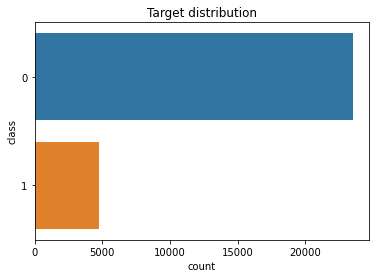

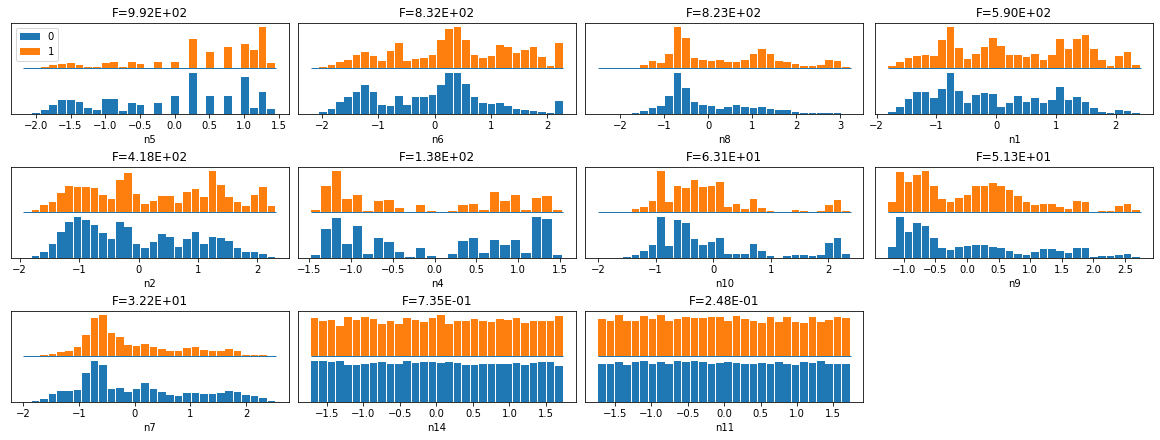

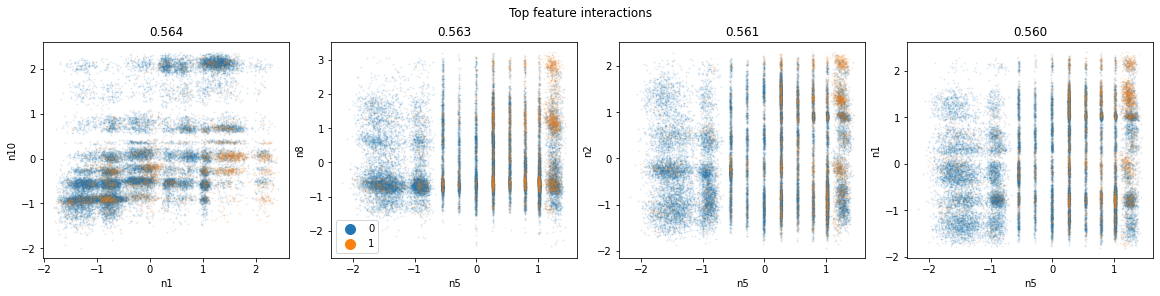

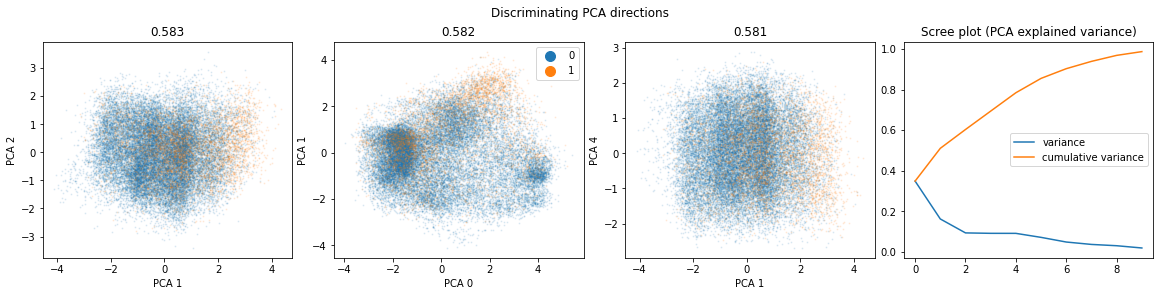

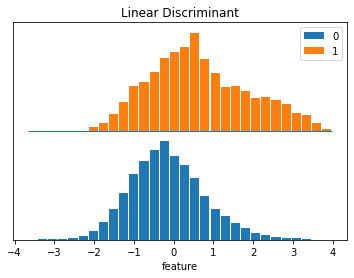

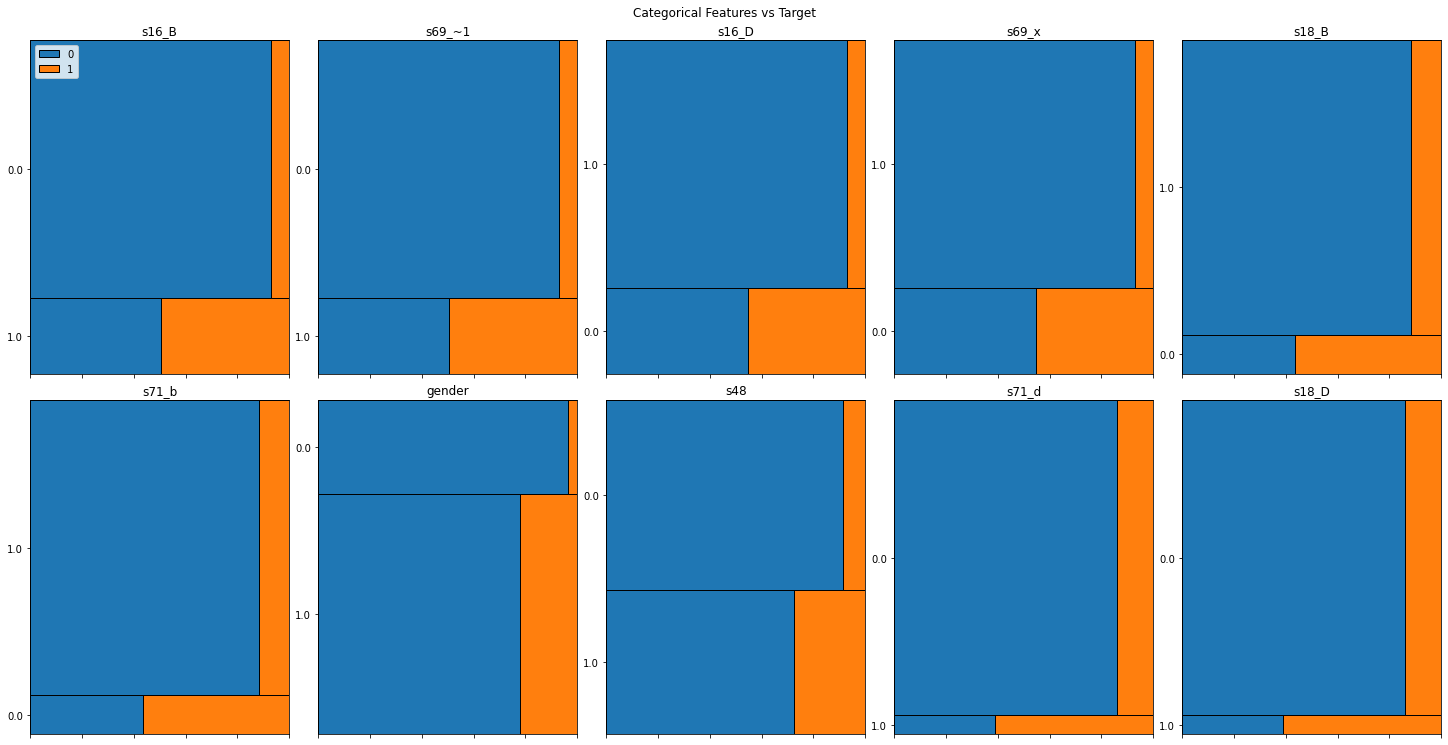

In [22]:
dabl.plot(df, target_col = "label")

In [48]:
df_correleation =df[['gender', 's11', 's12', 's13', 's48', 's52', 's53', 's58', 'n1',
       'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12',
       'n13', 'n14', 'n15', 's16_A', 's16_B', 's16_C', 's16_D', 's17_A',
       's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D', 's69_0',
       's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B', 's70_op: C',
       's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d']]

df_correleation.drop(columns=['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14'], inplace= True)

c:\Users\Daraz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
df_correleation = df_correleation.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

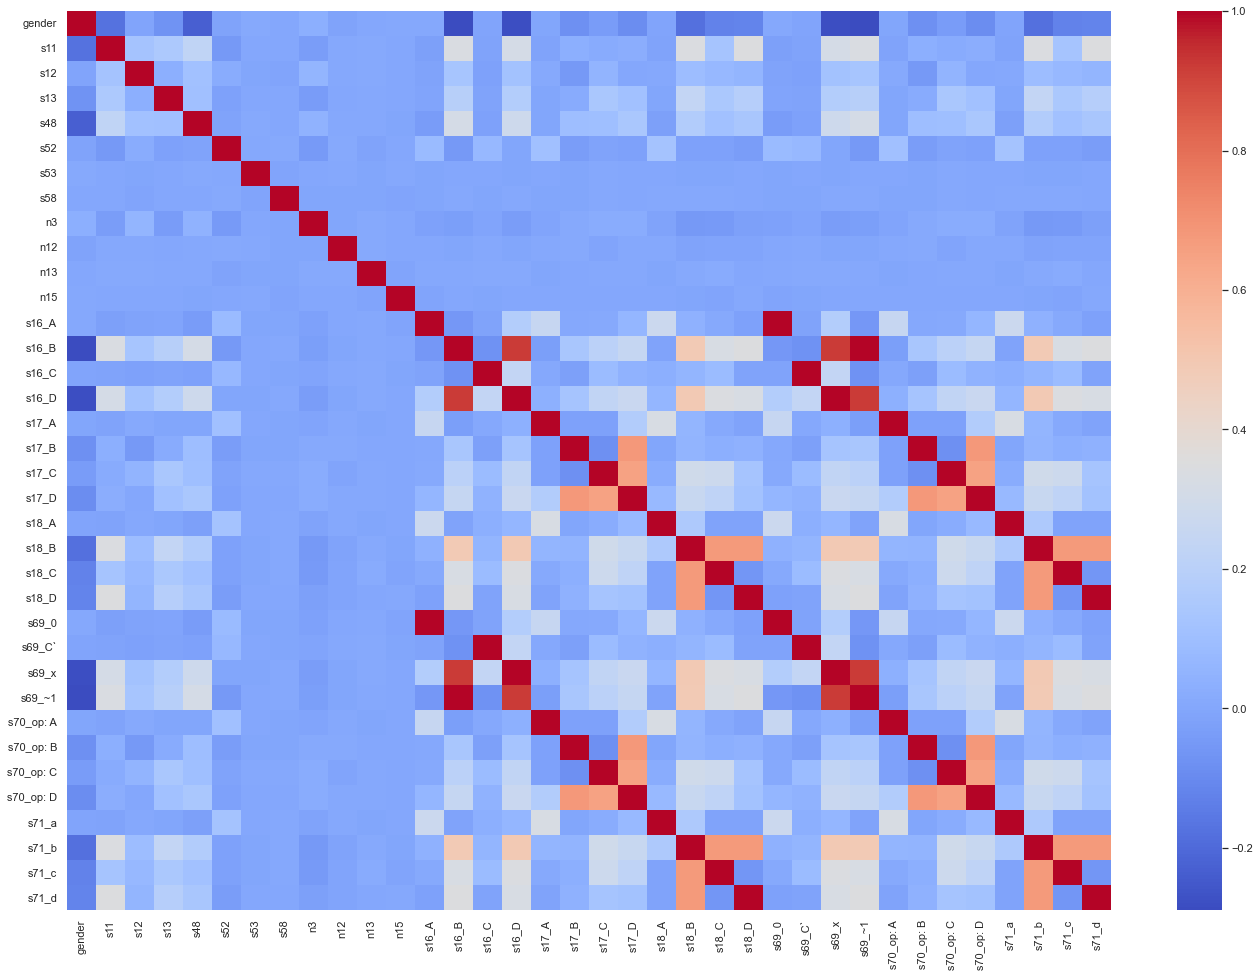

In [51]:
sns.set(rc={'figure.figsize':(23.4,16.54)})

dataplot = sns.heatmap(df_correleation, cmap="coolwarm")
  
# displaying heatmap
plt.show()

#### Dropping strongly correleated features based on the heatmap

In [53]:
features = df[[ 'gender', 's11', 's12', 's13', 's48', 's52', 's53', 's58', 'n1',
       'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12',
       'n13', 'n14', 'n15', 's16_A', 's16_C', 's16_D', 's17_A',
       's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D']]
       
features[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']] = normalized_df[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']]

#### Train-validation split

In [77]:
X= features
y= df['label']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [81]:
clf_lg = LogisticRegression(random_state=10, solver='lbfgs', max_iter=150).fit(X_train, y_train)

In [84]:
clf_svc = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train) # X= features of training set, y= target value of training set

In [85]:
clf_svc.score(X_val, y_val) #Testing the validation score

0.8671668137687555

In [86]:
test_df = pd.read_csv('test.csv')
majority_null = ['s59','s57','s56','s55','s54']

In [87]:
test_df.drop(majority_null, axis = 1, inplace= True)

In [88]:
label_encoder = preprocessing.LabelEncoder()
label_encode = ['gender','s11','s12','s53','s58']
for column in label_encode:
    test_df[column] = label_encoder.fit_transform(test_df[column]) 

In [89]:
one_hot_encode = ['s16','s17','s18','s69','s70','s71']
ohe_test_df = pd.get_dummies(test_df[one_hot_encode])
test_df = test_df.drop(columns=one_hot_encode, axis = 1)
test_df = test_df.join(ohe_test_df)

In [90]:
replacement_mapping_dict = {
    "l": "1",
    "o": "0"
}
test_df[['s52']] = test_df[['s52']].apply(lambda x: x.replace(replacement_mapping_dict, regex=True))
test_df['s52'] = test_df['s52'].astype(str).astype(int)


In [91]:
test_df[['gender','s11','s12','s13', 's48', 's52', 's53', 's58','n3','n12','n13','n15','s16_A', 's16_B', 's16_C', 's16_D','s17_A', 's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D','s69_0', 's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B','s70_op: C', 's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d']] =test_df[['gender','s11','s12','s13', 's48', 's52', 's53', 's58','n3','n12','n13','n15','s16_A', 's16_B', 's16_C', 's16_D','s17_A', 's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D','s69_0', 's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B','s70_op: C', 's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d']].astype(float)

In [92]:

test_df_desc= test_df[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']]
normalized_test_df=(test_df_desc-test_df_desc.mean())/test_df_desc.std()


In [93]:

test_features = test_df[[ 'gender', 's11', 's12', 's13', 's48', 's52', 's53', 's58', 'n1',
       'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12',
       'n13', 'n14', 'n15', 's16_A', 's16_C', 's16_D', 's17_A',
       's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D']]
       
test_features[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']] = normalized_test_df[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']]



c:\Users\Daraz\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [94]:

test_df_csv= pd.DataFrame()

In [95]:

test_df_csv['id']= test_df['id']
test_df_csv['label'] = " "

In [96]:
test_df_csv.shape

(85065, 2)

In [97]:
X_test = test_features
y_test = test_df_csv['label']

In [46]:
test_df_csv['label'] = clf_lg.predict(X_test)

In [98]:
test_df_csv['label'] = clf_svc.predict(X_test)

In [99]:
test_df_csv['label'].value_counts()

0    69106
1    15959
Name: label, dtype: int64

In [47]:
test_df_csv.to_csv("Submission_Totoro_aaaa12.csv", index=False)